# nn binary citurs

## Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-pastel')
import seaborn as sns

SEED = 42 # np.random.seed(SEED) - random 출력값 고정, jupyter에서는 한 sell에만 적용

import tensorflow as tf
import keras

In [3]:
!pip install --q ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.9 MB/s eta 0:00:00
time: 471 µs (started: 2024-06-28 07:03:04 +00:00)


## 데이터 불러오기

In [4]:
#!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/citrus.csv

time: 1.42 ms (started: 2024-06-28 07:03:04 +00:00)


In [5]:
citrus = pd.read_csv('/content/citrus.csv')
citrus.shape

(10000, 6)

time: 46.4 ms (started: 2024-06-28 07:03:04 +00:00)


In [6]:
citrus.head(5)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


time: 56.1 ms (started: 2024-06-28 07:03:04 +00:00)


In [7]:
df = citrus.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB
time: 25.2 ms (started: 2024-06-28 07:03:04 +00:00)


In [8]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


time: 35.5 ms (started: 2024-06-28 07:03:04 +00:00)


### 범주형 변수

In [9]:
df['name'].value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

time: 8.29 ms (started: 2024-06-28 07:03:04 +00:00)


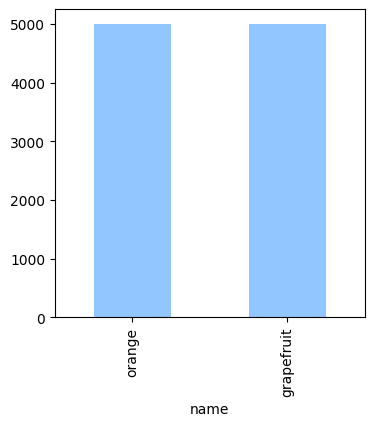

time: 220 ms (started: 2024-06-28 07:03:04 +00:00)


In [10]:
df['name'].value_counts().plot(kind='bar', figsize=(4,4))
plt.show()

### 연속형 변수

In [11]:
df_orange = df[df['name'] == 'orange']
df_grape = df[df['name'] == 'grapefruit']

time: 10.5 ms (started: 2024-06-28 07:03:04 +00:00)


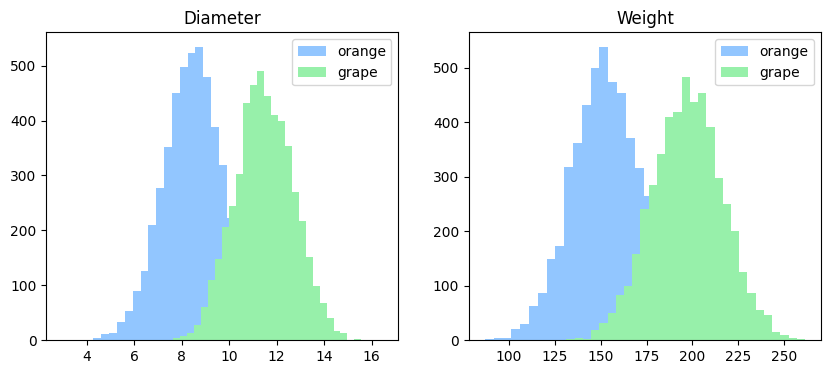

time: 1.32 s (started: 2024-06-28 07:03:04 +00:00)


In [12]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0].hist(df_orange['diameter'], bins=30, label='orange')
ax[0].hist(df_grape['diameter'], bins=30, label='grape')
ax[0].set_title('Diameter')
ax[0].legend()

ax[1].hist(df_orange['weight'], bins=30, label='orange')
ax[1].hist(df_grape['weight'], bins=30, label='grape')
ax[1].set_title('Weight')
ax[1].legend()

plt.show()

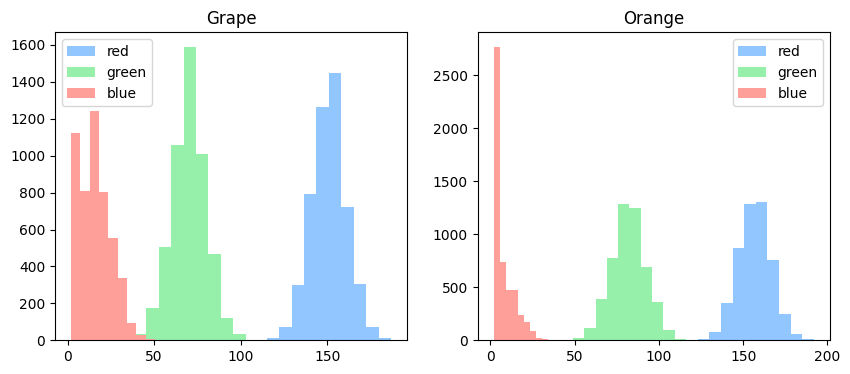

time: 787 ms (started: 2024-06-28 07:03:06 +00:00)


In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].hist(df_grape['red'], label='red')
ax[0].hist(df_grape['green'], label='green')
ax[0].hist(df_grape['blue'], label='blue')
ax[0].set_title('Grape')
ax[0].legend()

ax[1].hist(df_orange['red'], label='red')
ax[1].hist(df_orange['green'], label='green')
ax[1].hist(df_orange['blue'], label='blue')
ax[1].set_title('Orange')
ax[1].legend()

plt.show()

In [14]:
df.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

time: 12.2 ms (started: 2024-06-28 07:03:07 +00:00)


<Axes: >

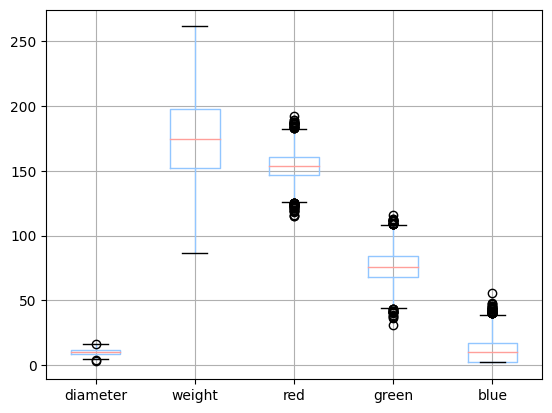

time: 572 ms (started: 2024-06-28 07:03:07 +00:00)


In [15]:
df[['name', 'diameter', 'weight', 'red', 'green', 'blue']].boxplot()

### 결측치 확인

In [16]:
df.isna().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

time: 10.5 ms (started: 2024-06-28 07:03:07 +00:00)


### 중복치 확인

In [17]:
df.duplicated().sum()

0

time: 13.5 ms (started: 2024-06-28 07:03:07 +00:00)


## 학습 데이터, 테스트 데이터 분리

In [18]:
df = df.sample(frac=1, random_state=SEED) # 데이터 섞기
df.head(5)

,name,diameter,weight,red,green,blue
6252,grapefruit,10.66,184.37,166,60,18
4684,orange,10.40,181.34,166,109,13
1731,orange,7.99,145.45,150,72,2
4742,orange,10.55,182.99,151,84,2
4521,orange,10.10,177.31,160,72,2


time: 78.6 ms (started: 2024-06-28 07:03:07 +00:00)


In [19]:
idx_train = int(len(df) * 0.6)
idx_val = int(len(df) * 0.8)

time: 634 µs (started: 2024-06-28 07:03:07 +00:00)


In [20]:
train = df.iloc[:idx_train,:]
val = df.iloc[idx_train:idx_val,:]
test = df.iloc[idx_val:,:]

train.shape, val.shape, test.shape

((6000, 6), (2000, 6), (2000, 6))

time: 10.2 ms (started: 2024-06-28 07:03:07 +00:00)


### X, y 변수 분리

In [21]:
X_train = train.drop(['name'], axis=1)
y_train = train['name']

X_val = val.drop(['name'], axis=1)
y_val = val['name']

time: 3.68 ms (started: 2024-06-28 07:03:07 +00:00)


In [22]:
print(y_train.value_counts())
print(y_val.value_counts())

name
orange        3062
grapefruit    2938
Name: count, dtype: int64
name
grapefruit    1042
orange         958
Name: count, dtype: int64
time: 19.9 ms (started: 2024-06-28 07:03:08 +00:00)


## 스케일링

In [23]:
X_train.head(5)

,diameter,weight,red,green,blue
6252,10.66,184.37,166,60,18
4684,10.40,181.34,166,109,13
1731,7.99,145.45,150,72,2
4742,10.55,182.99,151,84,2
4521,10.10,177.31,160,72,2


time: 43.8 ms (started: 2024-06-28 07:03:08 +00:00)


In [24]:
u = X_train.mean() # 평균
std = X_train.std() # 표준편차

time: 3.29 ms (started: 2024-06-28 07:03:08 +00:00)


In [25]:
X_train_s = (X_train - u) / std # 표준화
X_train_s.head(5)

,diameter,weight,red,green,blue
6252,0.372738,0.340350,1.138741,-1.366413,0.751860
4684,0.239331,0.236626,1.138741,2.790299,0.197186
1731,-0.997244,-0.991972,-0.390904,-0.348443,-1.023095
4742,0.316296,0.293110,-0.295301,0.669528,-1.023095
4521,0.085401,0.098670,0.565124,-0.348443,-1.023095


time: 34.6 ms (started: 2024-06-28 07:03:08 +00:00)


In [26]:
X_val_s = (X_val - u) / std # validation 표준화
X_val_s.head(5)

,diameter,weight,red,green,blue
2480,-0.756086,-0.751661,-0.390904,-0.009119,-0.801226
289,-1.756635,-1.753299,-0.104095,0.160542,-0.135618
6086,0.306034,0.266408,-1.538137,-1.536075,0.973729
3075,-0.561108,-0.558933,0.851932,2.281314,0.308121
8123,0.988460,1.001377,-0.773315,-1.366413,0.862794


time: 31.7 ms (started: 2024-06-28 07:03:08 +00:00)


In [27]:
ss_dic = {'mean':u, 'std':std}

time: 759 µs (started: 2024-06-28 07:03:08 +00:00)


## 인코딩
grapefruit : 0, orange : 1

In [28]:
label_dict = {'grapefruit':0, 'orange':1}

time: 584 µs (started: 2024-06-28 07:03:08 +00:00)


In [29]:
y_train_e = y_train.map(label_dict)
y_val_e = y_val.map(label_dict)

y_train_e.head(5), y_val_e.head(5)

(6252    0
 4684    1
 1731    1
 4742    1
 4521    1
 Name: name, dtype: int64,
 2480    1
 289     1
 6086    0
 3075    1
 8123    0
 Name: name, dtype: int64)

time: 8.27 ms (started: 2024-06-28 07:03:08 +00:00)


In [30]:
# numpy로 변경
X_train_s = X_train_s.to_numpy()
y_train_e = y_train_e.to_numpy()
X_val_s = X_val_s.to_numpy()
y_val_e = y_val_e.to_numpy()

time: 1.32 ms (started: 2024-06-28 07:03:08 +00:00)


In [31]:
print(X_train_s.shape, y_train_e.shape)
print(type(X_train_s), type(y_train_e))
print(X_val_s.shape, y_val_e.shape)
print(type(X_val_s), type(y_val_e))

(6000, 5) (6000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2000, 5) (2000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 944 µs (started: 2024-06-28 07:03:08 +00:00)


## 모델 학습

In [32]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=16, activation='relu', input_shape=(5,)),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 155 ms (started: 2024-06-28 07:04:00 +00:00)


In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

time: 24.5 ms (started: 2024-06-28 07:04:49 +00:00)


In [34]:
EPOCHS = 100
BATCH_SIZE = 16

history = model.fit(X_train_s, y_train_e, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_val_s,y_val_e))

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 0.3441 - accuracy: 0.8523 - val_loss: 0.1887 - val_accuracy: 0.9255
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1855 - accuracy: 0.9277 - val_loss: 0.1830 - val_accuracy: 0.9270
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1813 - accuracy: 0.9282 - val_loss: 0.1838 - val_accuracy: 0.9270
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1795 - accuracy: 0.9298 - val_loss: 0.1811 - val_accuracy: 0.9270
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1782 - accuracy: 0.9280 - val_loss: 0.1804 - val_accuracy: 0.9265
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1770 - accuracy: 0.9287 - val_loss: 0.1791 - val_accuracy: 0.9315
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1762 - accuracy: 0.9283 - val_loss: 0.1783 - val_accuracy: 0.9320

In [35]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'],hist['loss'],label='train_loss')
    plt.plot(hist['epoch'],hist['val_loss'],label='val_loss')
    plt.title('loss Curve')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'],hist['accuracy'],label='train_accuracy')
    plt.plot(hist['epoch'],hist['val_accuracy'],label='val_accuracy')
    plt.title('accuracy Curve')
    plt.legend()

    plt.show()

time: 982 µs (started: 2024-06-28 07:10:04 +00:00)


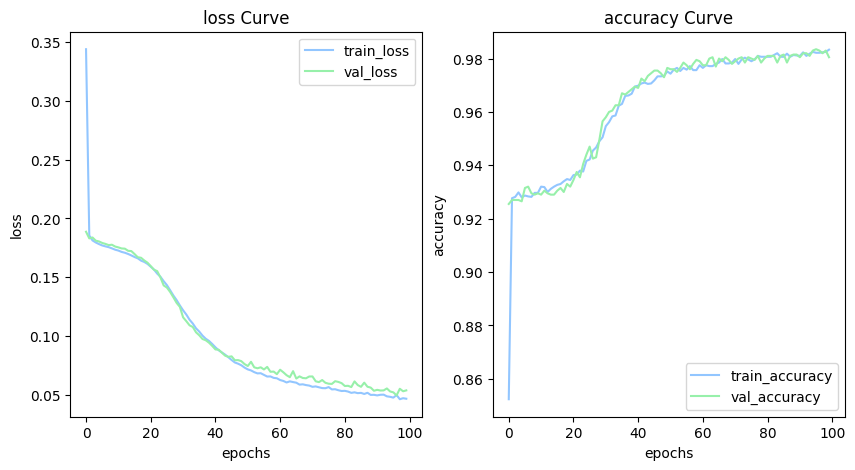

time: 487 ms (started: 2024-06-28 07:10:04 +00:00)


In [36]:
plot_history(history)

## 테스트

In [37]:
test.shape

(2000, 6)

time: 3.09 ms (started: 2024-06-28 07:10:06 +00:00)


In [38]:
X_test = test.drop(['name'],axis=1)
y_test = test['name']

time: 2.28 ms (started: 2024-06-28 07:10:06 +00:00)


In [39]:
X_test_s = (X_test - u) / std
y_test_e = y_test.map(label_dict)

time: 5.09 ms (started: 2024-06-28 07:10:06 +00:00)


In [40]:
X_test_s.shape, y_test_e.shape

((2000, 5), (2000,))

time: 3.05 ms (started: 2024-06-28 07:10:06 +00:00)


In [41]:
X_test_s = X_test_s.to_numpy()
y_test_e = y_test_e.to_numpy()
print(type(X_test_s), type(y_test_e))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 1.1 ms (started: 2024-06-28 07:10:06 +00:00)


### 평가 함수

In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy : ', accuracy_score(y_true, y_pred))
    print('recall : ', recall_score(y_true, y_pred, average=aver))
    print('precision : ', precision_score(y_true, y_pred, average=aver))
    print('f1 : ', f1_score(y_true, y_pred, average=aver))
    print('-----'*11)
    cfm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize = (3,3))
    s = sns.heatmap(cfm, annot=True, fmt='d', cbar=False, cmap='Purples')
    s.set(xlabel='Predcition', ylabel='Actual')
    plt.show()

time: 218 ms (started: 2024-06-28 07:10:06 +00:00)


In [43]:
y_pred = model.predict(X_test_s)

63/63 [==============================] - 0s 2ms/step
time: 457 ms (started: 2024-06-28 07:10:06 +00:00)


In [49]:
y_pred = (y_pred>0.5).astype(int)

time: 5.03 ms (started: 2024-06-28 07:11:43 +00:00)


In [51]:
y_pred = y_pred.reshape(-1)

time: 658 µs (started: 2024-06-28 07:12:01 +00:00)


accuracy :  0.9795
recall :  0.963265306122449
precision :  0.9947312961011591
f1 :  0.9787454639709695
-------------------------------------------------------


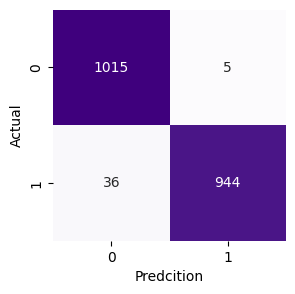

time: 148 ms (started: 2024-06-28 07:12:05 +00:00)


In [52]:
print_metrics(y_test_e,y_pred)